# A2 - Analyzing Filtered Repositories
This notebooks investigates features from repositories that where collected and survived the filtering.
Besides their name, owner and description the following features were collected with each repository:
 - Primary language and number of languages in total
 - Disk usage and the dates the repository was created and last pushed
 - Number of commits, branches, pull requests and forks
 - Number of contributors, watchers and stargazers
 - Number of issues, tags and releases


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from src.db.database import connect, Notebook, PythonFile
from src.helpers.h7_analysis_helpers import get_python_version
from src.config.states import QUERY_FILTERED, QUERY_SELECTED
from src.config.states import NB_AGGREGATED, PF_AGGREGATED

In [2]:
with connect() as session:
    queries = pd.read_sql_table("queries", session.connection())
    filtered = queries[(queries["state"] ==  QUERY_FILTERED) |
                       (queries["state"] == QUERY_SELECTED)]
print('Total of Repositories Filtered: ',len(filtered))

Total of Repositories Filtered:  203355


### Languages
In this section we will investigate the languages that are used in Data Science Projects

#### Most Popular Primary Language

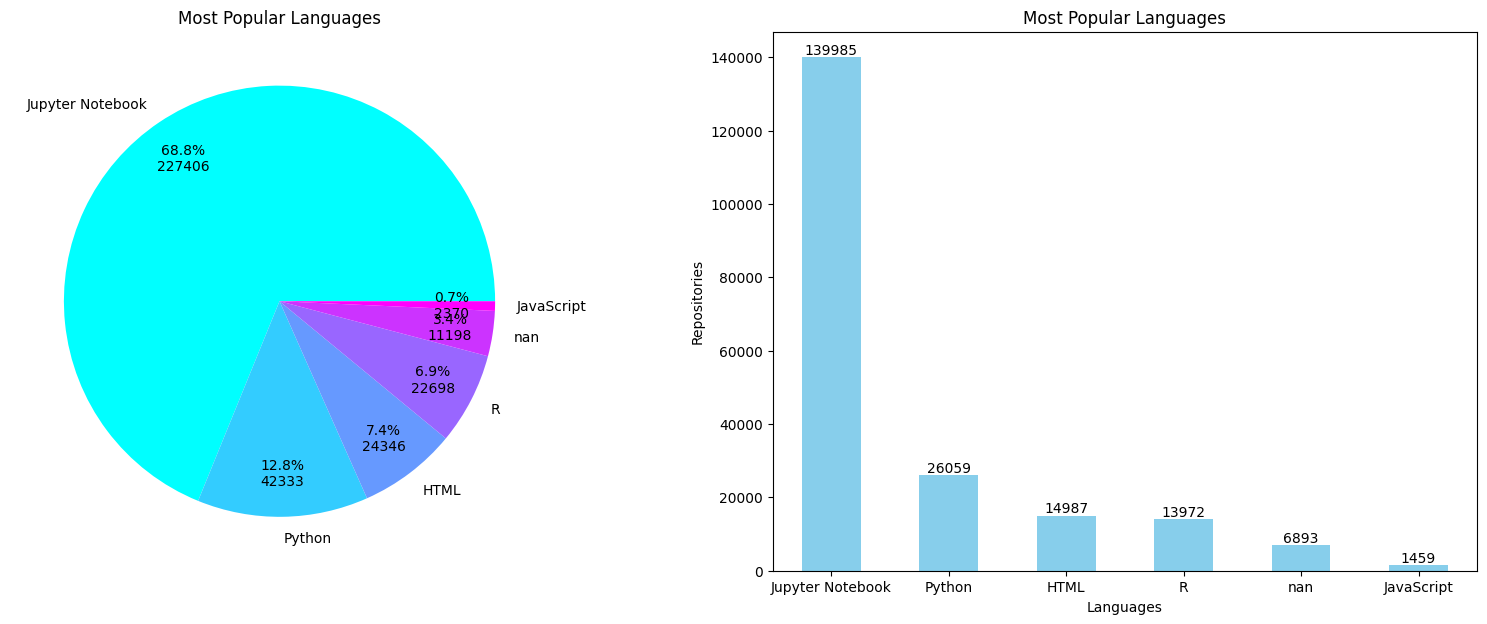

In [76]:
primary_languages = filtered.primary_language\
    .value_counts(dropna=False)\
    .rename_axis('primary_language').to_frame("Repositories")

pl = primary_languages[:5].reset_index(level=0)
others = pd.DataFrame(data = {
    'PrimaryLanguage' : ['Other Languages'],
    'Repositories' : [primary_languages['Repositories'][5:].sum()]
})

pl2 = pd.concat([pl,others]).reset_index(drop=True)\
    .sort_values(by='Repositories', ascending=False)

fig1, ax1 = plt.subplots(ncols=2, figsize=(20,7))
pl2.plot.pie(ax=ax1[0], y="Repositories", title="Most Popular Languages",
             labels=pl2["primary_language"], ylabel='',cmap="cool", pctdistance=0.8,
             autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(queries) * prct_value / 100))) ).get_legend().remove()
pl2.plot.bar(ax=ax1[1], color="skyblue", title="Most Popular Languages",
             xlabel='Languages', ylabel='Repositories',
             ).get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4,5],
           labels=pl2["primary_language"], rotation=0)
ax1[1].bar_label(ax1[1].containers[0], label_type='edge');

#### Number of Languages per Repository

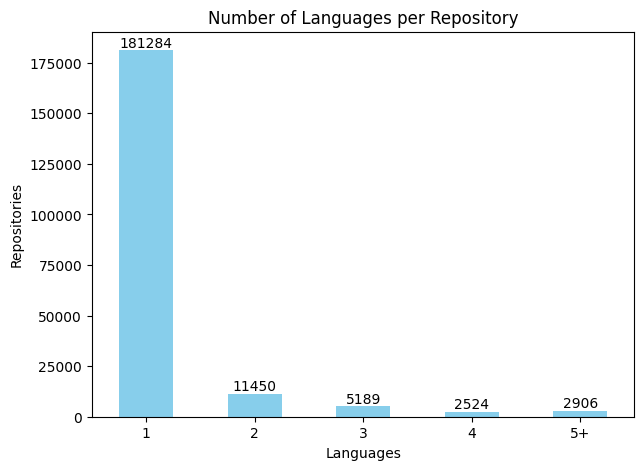

In [9]:
languages = filtered.languages\
    .value_counts(dropna=False, bins = [1,2, 3, 4, 5, 100])\
    .sort_index().to_frame("Repositories")

fig2, ax2 = plt.subplots( figsize=(7,5))
languages.plot.bar(title='Number of Languages per Repository', color='skyblue', ax=ax2,
                   xlabel='Languages', ylabel='Repositories').get_legend().remove()
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2','3', '4', '5+'], rotation=0)
ax2.bar_label(ax2.containers[0], label_type='edge');

### Commits, Pull Requests and Branchs

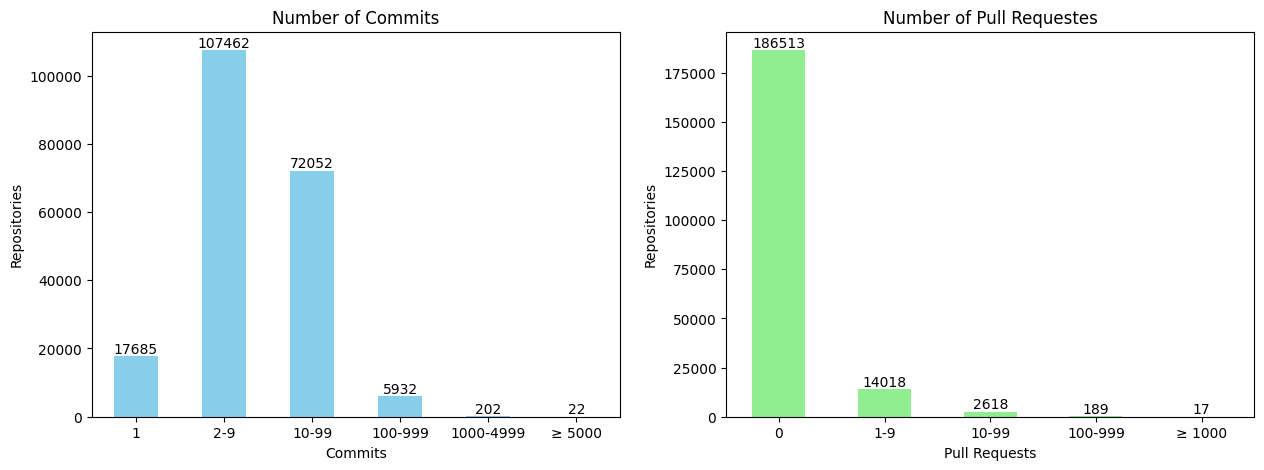

In [71]:
fig3, ax3 = plt.subplots( figsize=(15, 5), ncols=2)
commits = filtered.commits\
    .value_counts(dropna=False, bins = [0, 1,9,99,999, 4999, 100000])\
    .sort_index().to_frame("Repositories")

pull_requests = filtered.pull_requests\
    .value_counts(dropna=False, bins = [-1,0,9,99,999, 100000])\
    .sort_index().to_frame("Repositories")

commits.plot.bar(title='Number of Commits', color='skyblue', ax=ax3[0],
                   xlabel='Commits', ylabel='Repositories').get_legend().remove()
ax3[0].set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['1', '2-9', '10-99','100-999', '1000-4999', '≥ 5000'], rotation=0)
ax3[0].bar_label(ax3[0].containers[0], label_type='edge')

pull_requests.plot.bar(title='Number of Pull Requestes', color='lightgreen', ax=ax3[1],
                   xlabel='Pull Requests', ylabel='Repositories').get_legend().remove()

ax3[1].set_xticks(ticks=[0, 1, 2, 3, 4], labels=['0','1-9', '10-99','100-999', '≥ 1000'], rotation=0)
ax3[1].bar_label(ax3[1].containers[0], label_type='edge');

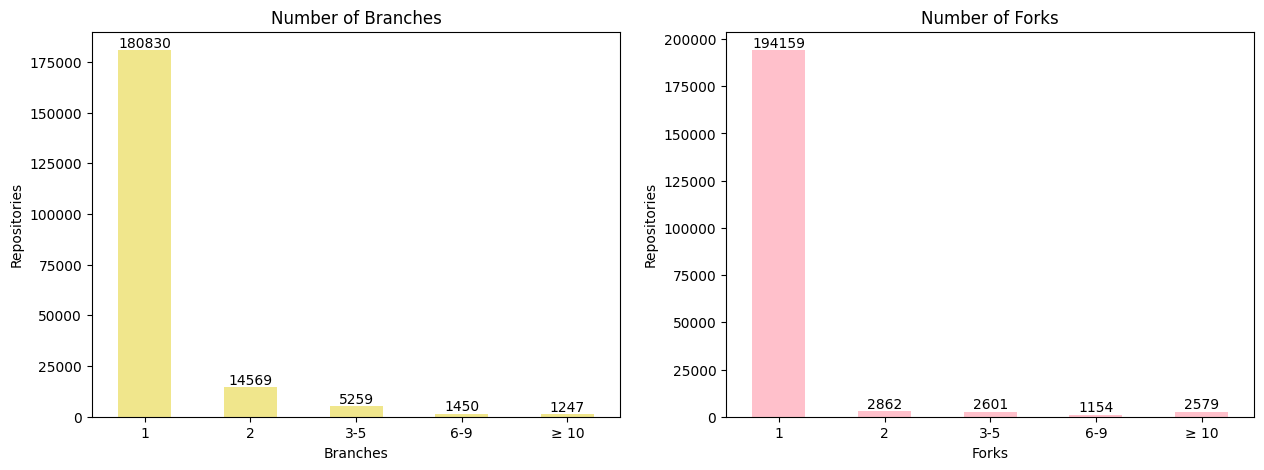

In [74]:
fig4, ax4 = plt.subplots( figsize=(15, 5), ncols=2)

branches = filtered.branches\
    .value_counts(dropna=False, bins = [0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")

forks = filtered.forks\
    .value_counts(dropna=False, bins = [0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")

branches.plot.bar(title='Number of Branches', color='khaki', ax=ax4[0],
                   xlabel='Branches', ylabel='Repositories').get_legend().remove()

ax4[0].set_xticks(ticks=[0, 1, 2, 3, 4], labels=['1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax4[0].bar_label(ax4[0].containers[0], label_type='edge')

forks.plot.bar(title='Number of Forks', color='pink', ax=ax4[1],
                   xlabel='Forks', ylabel='Repositories').get_legend().remove()

ax4[1].set_xticks(ticks=[0, 1, 2, 3, 4], labels=['1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax4[1].bar_label(ax4[1].containers[0], label_type='edge');